In [18]:
import preprocessing as prep
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import helper as hlp
from bb_binary import FrameContainer, Repository, load_frame_container

In [33]:
%matplotlib inline

In [8]:
path = "../00_Data/testset_2015_20m/2015082215/"

In [9]:
files = hlp.get_files(path)

In [344]:
tfile = files[1]

In [345]:
tfile

array([ '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015082215/2015/08/22/15/20/Cam_3_2015-08-22T15:21:05.458108Z--2015-08-22T15:26:46.471613Z.bbb',
       '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015082215/2015/08/22/15/20/Cam_0_2015-08-22T15:21:07.042200Z--2015-08-22T15:26:48.057704Z.bbb',
       '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015082215/2015/08/22/15/20/Cam_2_2015-08-22T15:21:07.161206Z--2015-08-22T15:26:48.177711Z.bbb',
       '/Users/alexa/Projects/bees-sna/00_Data/testset_2015_20m/2015082215/2015/08/22/15/20/Cam_1_2015-08-22T15:21:30.345531Z--2015-08-22T15:27:11.361037Z.bbb'], 
      dtype='<U150')

In [122]:
c = 0.99

In [123]:
df3 = prep.get_dataframe2(load_frame_container(tfile[0]))
df0 = prep.get_dataframe2(load_frame_container(tfile[1]))
df2 = prep.get_dataframe2(load_frame_container(tfile[2]))
df1 = prep.get_dataframe2(load_frame_container(tfile[3]))

In [124]:
df3 = prep.calcIds(df3,c)
df0 = prep.calcIds(df0,c)
df2 = prep.calcIds(df2,c)
df1 = prep.calcIds(df1,c)

In [125]:
# cam 0 und cam1 nach rechts verschieben
df0.xpos = df0.xpos + 3000
df1.xpos = df1.xpos + 3000

In [126]:
# Seiten zusammenfugen
side0 = pd.concat([df3, df0])
side1 = pd.concat([df2, df1])

In [336]:
s00 = side0[side0.frame_idx == 250]
s10 = side1[side1.frame_idx == 250]

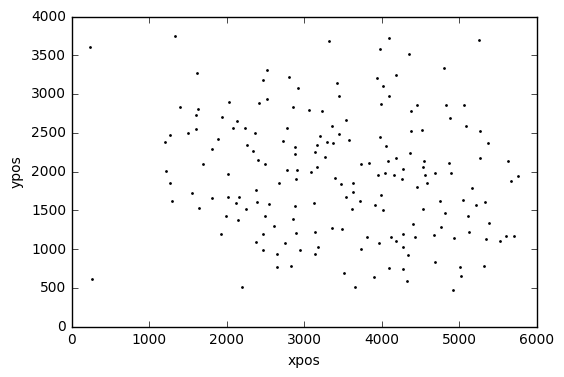

In [337]:
s00.plot.scatter(x='xpos', y='ypos', xlim=(0,6000), ylim=(0,4000), s=1)

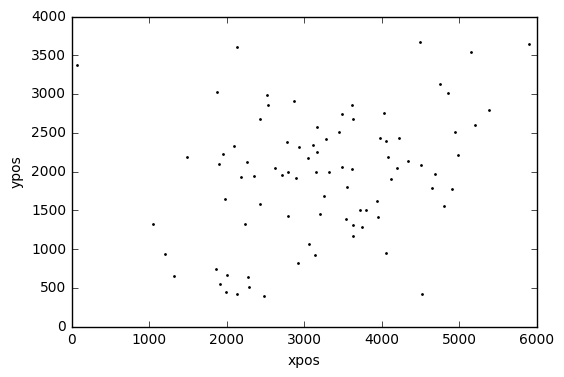

In [338]:
s10.plot.scatter(x='xpos', y='ypos', xlim=(0,6000), ylim=(0,4000), s=1)

In [339]:
s10['dupf'] = s10.duplicated('id', keep=False)
s00['dupf'] = s00.duplicated('id', keep=False)
s10['dupl'] = s10.duplicated('id', keep=False)
s00['dupl'] = s00.duplicated('id', keep=False)

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

In [340]:
def f(value):
    retval = 'k'
    if(value.dupf):
        retval = 'r'
    if(value.dupl):
        retval = 'r'
    
    return retval
    

In [341]:
s10['color'] = s10.apply(f, axis=1)
s00['color'] = s00.apply(f, axis=1)

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


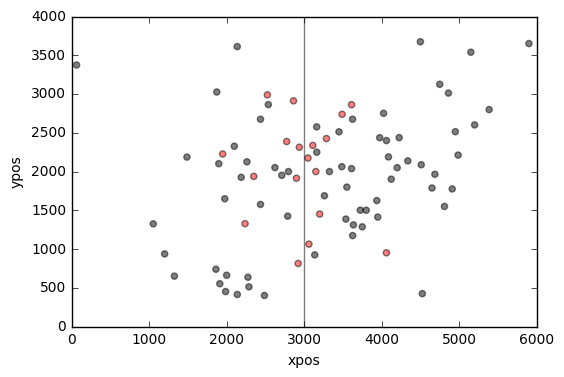

In [342]:
axes = s10.plot.scatter(x='xpos', y='ypos', xlim=(0,6000), ylim=(0,4000), s=20, c=s10.color, alpha=0.5)
axes.plot([3000, 3000],[0,4000], c='k', alpha=0.5)

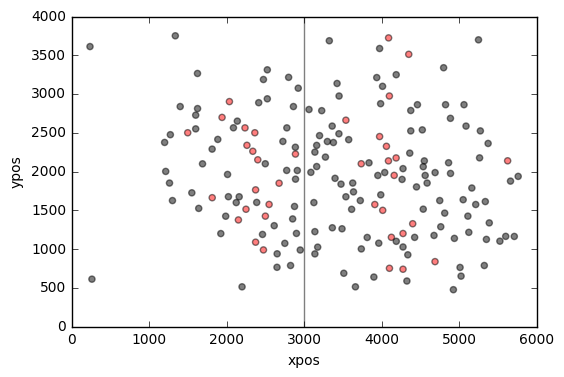

In [343]:
axes = s00.plot.scatter(x='xpos', y='ypos', xlim=(0,6000), ylim=(0,4000), s=20, c=s10.color, alpha=0.5)
axes.plot([3000, 3000],[0,4000], c='k', alpha=0.5)

In [324]:
s = DataFrame([1,2,3,4,5,1,2,3,1,2])

In [325]:
s['dup'] = s.duplicated(keep='last')

In [326]:
s

,0,dup
0,1,True
1,2,True
2,3,True
3,4,False
4,5,False
5,1,True
6,2,True
7,3,False
8,1,False
9,2,False
